# 1. Data Preparation

# 1.1 Data cleaning

Import libraries

In [458]:
# Basic numerics
import numpy as np
import scipy as sp
import scipy.stats as st

# Data handling
import pandas as pd
from datetime import datetime

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistical modelling tools
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

Step 1: Read data task, supplier, and cost

In [461]:
# Read the data task
task_data = pd.read_csv('tasks.csv') 
task_data.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.28,...,50,0,93828.91,759621.99,12264068,0,382,0.07,28150864,0.04
1,T2,0,5792,327432022,1619,27.9523480662983%,105875589,32%,1097,0.19,...,875,0,924983.41,3294170.58,29172807,0,552,0.10,28894396,0.09
2,T3,469,4346,547810586,1376,31.6612977450529%,90478530,17%,1097,0.25,...,394,0,258487.96,1781016.69,39064840,0,706,0.16,19579305,0.04
3,T4,529,7132,700169181,2362,33.1183398766124%,149526281,21%,1474,0.21,...,997,0,640011.29,2434120.90,29710103,0,371,0.05,22272333,0.03
4,T5,0,4767,278792402,1215,25.4877281308999%,87557248,31%,1038,0.22,...,567,0,625549.93,2506860.98,22039095,0,93,0.02,3058291,0.01


In [463]:
# Read the data supplier
supplier_data = pd.read_csv('suppliers.csv') 
supplier_data.head()

,Features,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S55,S56,S57,S58,S59,S60,S61,S62,S63,S64
0,SF1,100,100,100,100,10,10,100,100,1000,...,10,10,100,1000,10,10,100,1000,100,100
1,SF2,1000,1000,1000,1000,1000,100,2000,1000,2000,...,2000,100,2000,2000,2000,100,2000,1000,1000,2000
2,SF3,1000,1000,1000,1000,100,2000,1000,100,100,...,1000,2000,2000,2000,100,100,1000,2000,1000,1000
3,SF4,50,50,50,50,500,5,5,50,500,...,50,50,50,5,50,5,5,5,50,500
4,SF5,20,20,20,20,200,200,20,2,20,...,20,20,20,200,20,200,2,200,200,2


In [465]:
# Read the data cost
cost_data = pd.read_csv('cost.csv') 
cost_data.head()

,Task ID,Supplier ID,Cost
0,T34,S1,0.48
1,T34,S2,0.44
2,T34,S3,0.52
3,T34,S4,0.31
4,T34,S5,0.36


Remarks:

Task
- 1 row per task
- 1 column per task feature

Supplier
- 1 column per supplierID (there are 64 suppliers)
- 1 row per supplier feature (there are 18 features)

Cost
- Each row gives the cost value per task if performed by one particular supplier

Step 2: Check missing values

In [469]:
# Check for missing data in all three datasets
task_missing = task_data.isnull().sum().sum()
supplier_missing = supplier_data_transposed.isnull().sum().sum()
cost_missing = cost_data.isnull().sum().sum()

# Display the results
print(f"Missing values in tasks.csv: {task_missing}")
print(f"Missing values in suppliers.csv: {supplier_missing}")
print(f"Missing values in cost.csv: {cost_missing}")

Missing values in tasks.csv: 0
Missing values in suppliers.csv: 0
Missing values in cost.csv: 0


No missing values

Step 3: Check duplicates

In [473]:
# Check for duplicates in each dataset
task_duplicate = task_data.duplicated().sum()
supplier_duplicate = supplier_data_transposed.duplicated().sum()
cost_duplicate = cost_data.duplicated().sum()

# Display the results
print(f"Duplicate rows in tasks.csv: {task_duplicate}")
print(f"Duplicate rows in suppliers.csv: {supplier_duplicate}")
print(f"Duplicate rows in cost.csv: {cost_duplicate}")

Duplicate rows in tasks.csv: 0
Duplicate rows in suppliers.csv: 0
Duplicate rows in cost.csv: 0


Step 4: Check data format

In [476]:
task_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(56), int64(58), object(3)
memory usage: 119.0+ KB


In [478]:
supplier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  18 non-null     object
 1   S1        18 non-null     int64 
 2   S2        18 non-null     int64 
 3   S3        18 non-null     int64 
 4   S4        18 non-null     int64 
 5   S5        18 non-null     int64 
 6   S6        18 non-null     int64 
 7   S7        18 non-null     int64 
 8   S8        18 non-null     int64 
 9   S9        18 non-null     int64 
 10  S10       18 non-null     int64 
 11  S11       18 non-null     int64 
 12  S12       18 non-null     int64 
 13  S13       18 non-null     int64 
 14  S14       18 non-null     int64 
 15  S15       18 non-null     int64 
 16  S16       18 non-null     int64 
 17  S17       18 non-null     int64 
 18  S18       18 non-null     int64 
 19  S19       18 non-null     int64 
 20  S20       18 non-null     int64 
 21  S21       18 non-n

In [480]:
cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB


# 1.2 Feature selection and Scaling

In [483]:
from sklearn.preprocessing import MinMaxScaler

# Remove non-numeric columns like 'Task ID' from scaling
task_data_numeric = task_data.drop(columns=["Task ID"])

# Convert percentage strings to numeric values and clean non-numeric data
task_data_numeric = task_data_numeric.apply(
    lambda col: col.map(lambda x: float(x.strip('%')) / 100 if isinstance(x, str) and '%' in x else x)
)

# Ensure all data is numeric
task_data_numeric = task_data_numeric.apply(pd.to_numeric, errors='coerce')

# Scale the numeric features
scaler = MinMaxScaler()
task_data_scaled = scaler.fit_transform(task_data_numeric)

# Convert scaled features back to a DataFrame
task_data_scaled_df = pd.DataFrame(task_data_scaled, columns=task_data_numeric.columns)

# Add the Task ID column back to the scaled DataFrame
scaled_task_data = pd.concat(
    [task_data["Task ID"].reset_index(drop=True), task_data_scaled_df], axis=1
)

# Display the results
print(scaled_task_data.head())

  Task ID  TF1  TF2  TF3  TF4  TF5  TF6  TF7  TF8  TF9  ...  TF107  TF108  \
0      T1 0.47 0.59 0.82 0.59 0.54 0.70 0.28 0.53 0.46  ...   0.04   0.00   
1      T2 0.00 0.69 0.37 0.42 0.27 0.50 0.44 0.38 0.00  ...   0.70   0.00   
2      T3 0.66 0.47 0.68 0.34 0.35 0.41 0.20 0.38 0.32  ...   0.32   0.00   
3      T4 0.75 0.89 0.90 0.67 0.37 0.76 0.26 0.54 0.09  ...   0.80   0.00   
4      T5 0.00 0.54 0.30 0.28 0.22 0.40 0.43 0.35 0.14  ...   0.46   0.00   

   TF109  TF110  TF111  TF112  TF113  TF114  TF115  TF116  
0   0.03   0.09   0.18   0.00   0.30   0.20   0.47   0.33  
1   0.25   0.38   0.42   0.00   0.44   0.26   0.48   0.75  
2   0.07   0.20   0.56   0.00   0.57   0.48   0.32   0.33  
3   0.17   0.28   0.42   0.00   0.29   0.13   0.37   0.25  
4   0.17   0.29   0.32   0.00   0.05   0.03   0.04   0.08  

[5 rows x 117 columns]


In [490]:
# Remove the 'Features' column to work only with numeric supplier features
supplier_data_numeric = supplier_data.iloc[:, 1:]  # Skip the 'Features' column

# Scale the numeric features
scaler = MinMaxScaler()
supplier_data_scaled = scaler.fit_transform(supplier_data_numeric)

# Convert scaled features back to a DataFrame
supplier_data_scaled_df = pd.DataFrame(
    supplier_data_scaled,
    columns=supplier_data_numeric.columns,  # Supplier IDs as columns
)

# Add the Features column back to the scaled DataFrame
scaled_supplier_data = pd.concat(
    [supplier_data["Features"].reset_index(drop=True), supplier_data_scaled_df], axis=1
)

# Display the results
print(scaled_supplier_data.head())

  Features   S1   S2   S3   S4   S5   S6   S7   S8   S9  ...  S55  S56  S57  \
0      SF1 0.02 0.02 0.02 0.02 0.00 0.00 0.01 0.01 0.12  ... 0.00 0.00 0.00   
1      SF2 0.20 0.20 0.20 0.20 0.07 0.01 0.25 0.07 0.25  ... 0.50 0.01 0.04   
2      SF3 0.20 0.20 0.20 0.20 0.01 0.27 0.12 0.01 0.01  ... 0.25 0.27 0.04   
3      SF4 0.01 0.01 0.01 0.01 0.03 0.00 0.00 0.00 0.06  ... 0.01 0.01 0.00   
4      SF5 0.00 0.00 0.00 0.00 0.01 0.03 0.00 0.00 0.00  ... 0.00 0.00 0.00   

   S58  S59  S60  S61  S62  S63  S64  
0 0.12 0.00 0.00 0.02 0.07 0.01 0.00  
1 0.25 0.13 0.01 0.50 0.07 0.13 0.04  
2 0.25 0.01 0.01 0.25 0.13 0.13 0.02  
3 0.00 0.00 0.00 0.00 0.00 0.01 0.01  
4 0.02 0.00 0.03 0.00 0.01 0.03 0.00  

[5 rows x 65 columns]


# 1.3 Top Supplier Identification

In [495]:
# Identify the top-performing suppliers for each task based on cost
top_supplier = cost_data.loc[cost_data.groupby("Task ID")["Cost"].idxmin()]
print(top_supplier.head())

     Task ID Supplier ID  Cost
1169      T1         S18  0.36
439      T10         S56  0.32
5752    T100         S57  0.41
5795    T101         S36  0.41
5879    T102         S56  0.39


In [501]:
# Remove the worst-performing suppliers (keeping only the top 50% for simplicity)
median_cost = cost_data.groupby("Supplier ID")["Cost"].median()
top_supplier_ids = median_cost[median_cost <= median_cost.median()].index
print(top_supplier_ids) # there are 32 top suppliers

Index(['S10', 'S11', 'S13', 'S14', 'S15', 'S18', 'S19', 'S22', 'S24', 'S27',
       'S29', 'S33', 'S34', 'S37', 'S39', 'S4', 'S42', 'S46', 'S47', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S56', 'S57', 'S59', 'S6', 'S64',
       'S8', 'S9'],
      dtype='object', name='Supplier ID')


In [503]:
# Filter the cost dataset to retain only the top-performing suppliers
filtered_cost_data = cost_data[cost_data["Supplier ID"].isin(top_supplier_ids)]

# Summarize results
top_supplier_summary = top_supplier.head()
remaining_supplier_count = filtered_cost_data["Supplier ID"].nunique()

print(top_supplier_summary)
print(f"Remaining suppliers count: {remaining_supplier_count}")

     Task ID Supplier ID  Cost
1169      T1         S18  0.36
439      T10         S56  0.32
5752    T100         S57  0.41
5795    T101         S36  0.41
5879    T102         S56  0.39
Remaining suppliers count: 32


# 2. Exploratory Data Analysis (EDA) (this was only for supplier data, may be removed if not relevant anymore)

Step 1: Univariate analysis

In [508]:
# Set display option for 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Get summary statistics per column
print(data.describe())

Features     SF1     SF2     SF3    SF4    SF5    SF6   SF7    SF8     SF9  \
count      64.00   64.00   64.00  64.00  64.00  64.00 64.00  64.00   64.00   
mean      353.12 1031.25 1031.25 176.56  70.62  35.31  1.97 188.75 2062.50   
std       441.16  757.37  757.37 220.58  88.23  44.12  0.84 213.62 1514.74   
min        10.00  100.00  100.00   5.00   2.00   1.00  0.00   8.00  200.00   
25%        10.00  100.00  100.00   5.00   2.00   1.00  1.00   8.00  200.00   
50%       100.00 1000.00 1000.00  50.00  20.00  10.00  2.00  80.00 2000.00   
75%      1000.00 2000.00 2000.00 500.00 200.00 100.00  3.00 500.00 4000.00   
max      1000.00 2000.00 2000.00 500.00 200.00 100.00  3.00 500.00 4000.00   

Features   SF10    SF11  SF12    SF13    SF14    SF15    SF16     SF17  SF18  
count     64.00   64.00 64.00   64.00   64.00   64.00   64.00    64.00 64.00  
mean     196.88 1031.25  4.69 1031.25 1031.25  828.12 4531.25 17307.81 94.75  
std      209.36  757.37  2.80  757.37  757.37  818.04 3010.4


Plotting histograms for feature distribution...


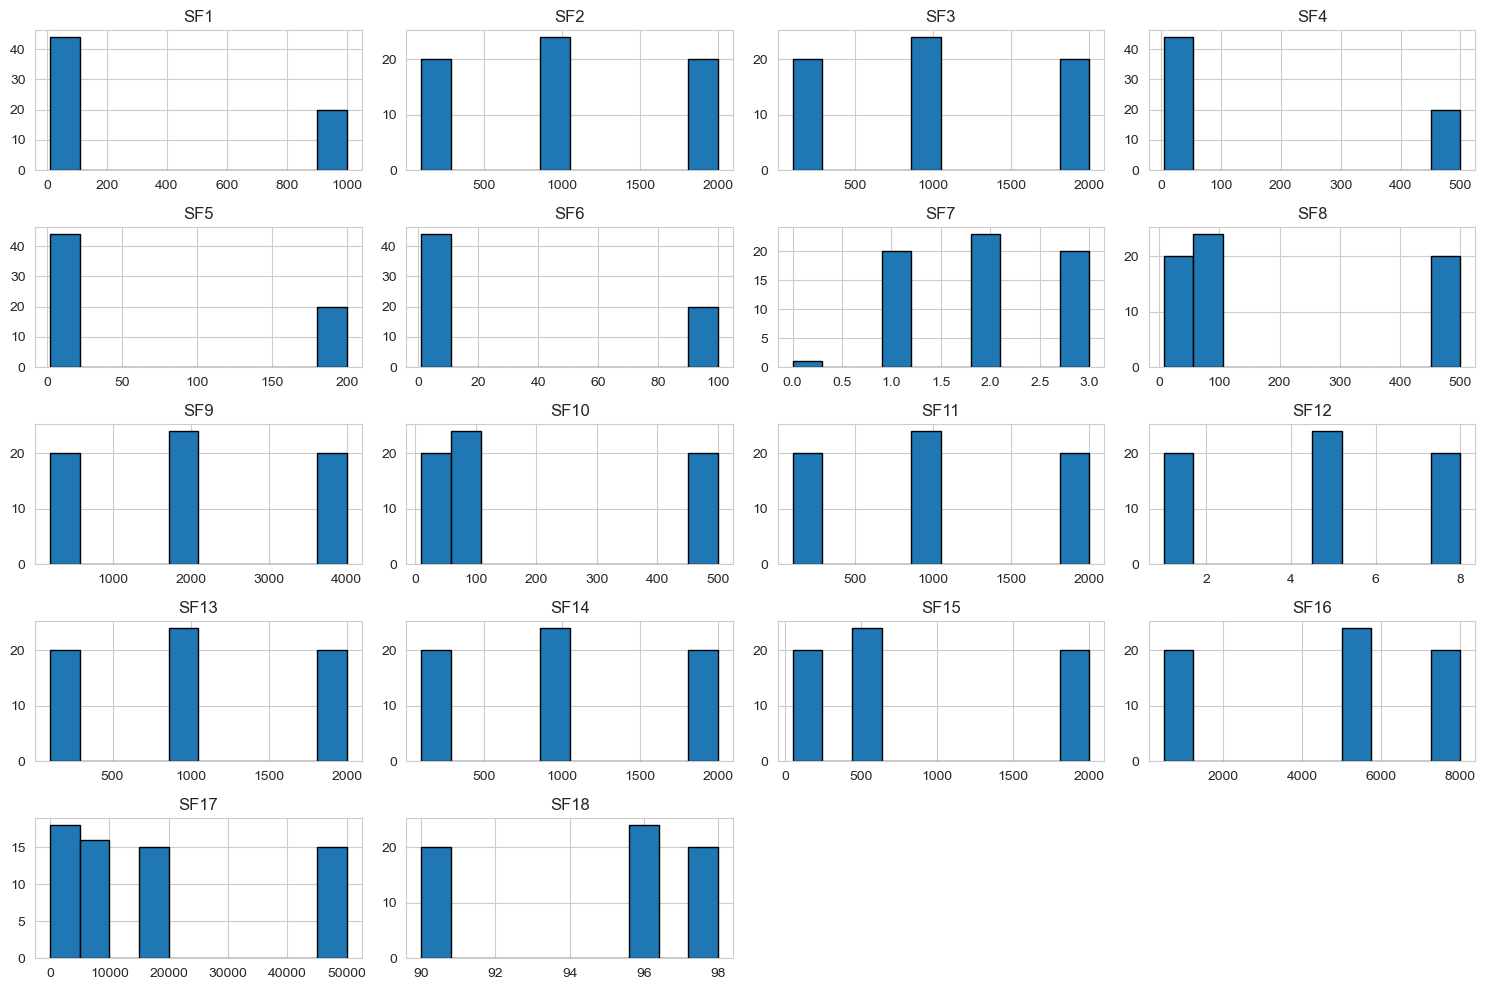

In [510]:
# Distribution of Features
print("\nPlotting histograms for feature distribution...")
data.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

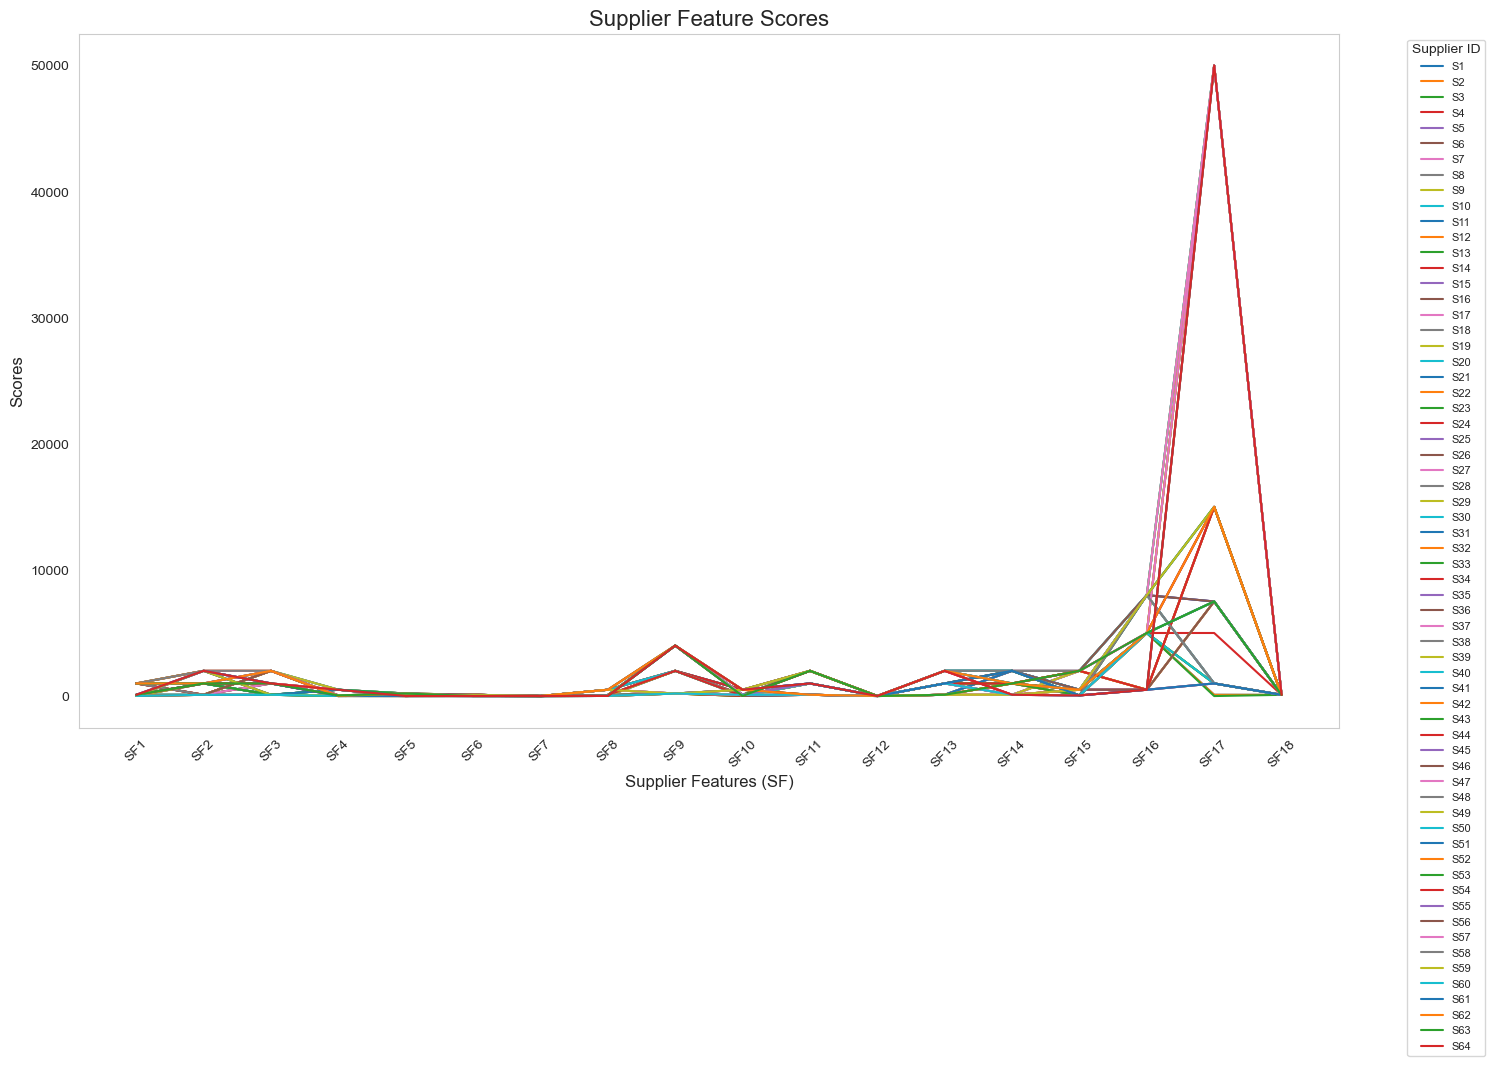

In [512]:
# Plotting the line graph
plt.figure(figsize=(15, 10))

# Plot each supplier's data as a separate line
for supplier_id in data.index:
    plt.plot(data.columns, data.loc[supplier_id], label=supplier_id)

# Enhancing the plot with labels and legend
plt.title("Supplier Feature Scores", fontsize=16)
plt.xlabel("Supplier Features (SF)", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Supplier ID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()

# Display the plot
plt.show()

Outliers can be found in SF9, SF16, SF17

Step 2: Bivariate analysis


Correlation Matrix:


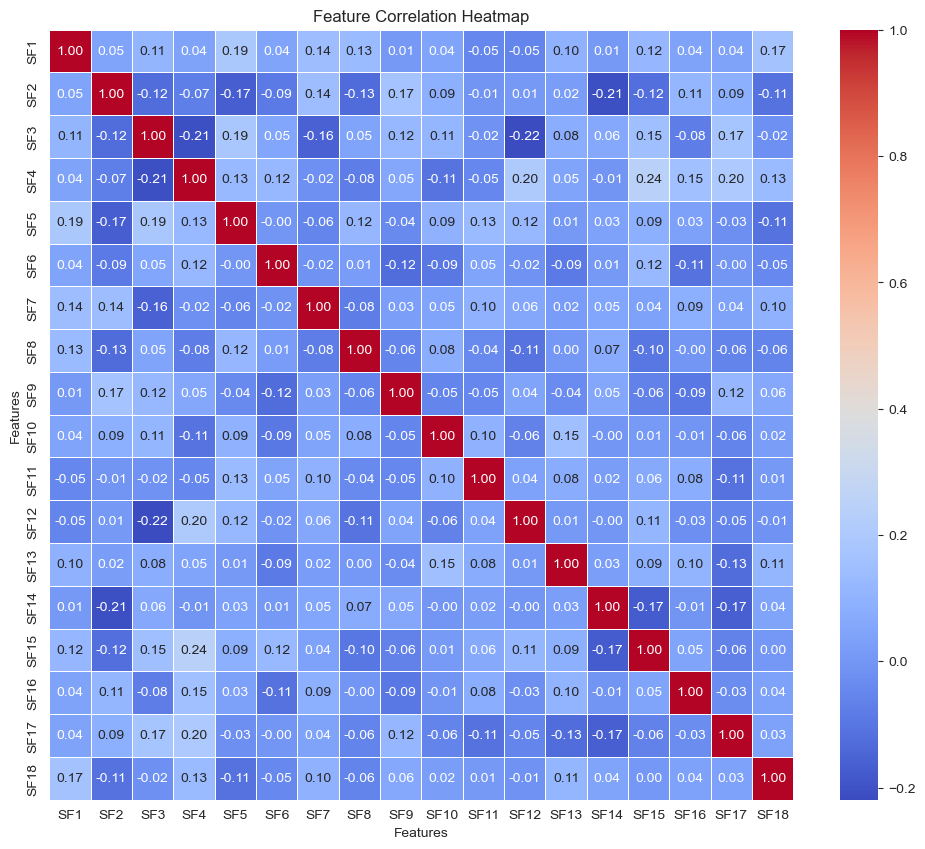

In [516]:
# Feature Correlation
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))  # Increase the figure size for better readability
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10},  # Adjust font size of annotations
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Transpose the dataset so each row represents one supplier and columns represent supplier features
supplier_data = supplier_data.set_index("Features").T.reset_index()

# Rename columns: 'index' becomes 'Supplier ID' and the rest are supplier features
supplier_data = supplier_data.rename(columns={"index": "Supplier ID"})

# Display the transposed dataset
print(supplier_data.head())